<a href="https://colab.research.google.com/github/oliia/BootcampDatathons/blob/main/Datathon_2_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [ ]:
''' Data Description
age: Age in years
sex: 1 = male, 0 = female
cp: Chest pain type
trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholesterol in mg/dl
fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results
thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: cinduced by exercise relative to rest
slope: The slope of the peak exercise ST segment
ca: Number of major vessels (0-4) colored by fluoroscopy
thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found
target: 1 = Heart disease present, 0 = Heart disease not present
'''

' Data Description\nage: Age in years\nsex: 1 = male, 0 = female\ncp: Chest pain type\ntrestbps: Resting blood pressure (in mm Hg on admission to the hospital)\nchol: serum cholesterol in mg/dl\nfbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)\nrestecg: Resting electrocardiographic results\nthalach: Maximum heart rate achieved\nexang: Exercise induced angina (1 = yes; 0 = no)\noldpeak: cinduced by exercise relative to rest\nslope: The slope of the peak exercise ST segment\nca: Number of major vessels (0-4) colored by fluoroscopy\nthal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found\ntarget: 1 = Heart disease present, 0 = Heart disease not present\n'

In [ ]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


# Categorical/Numerical features

In [ ]:
# numerical features 
num_col_df = heart_data[['age', 'trestbps', 'chol', 'thalach','oldpeak', 'slope','ca']]

In [ ]:
# categorical columns 
cat_col_indices = [1, 2, 5, 6, 8, 12]
cat_col_df = heart_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']]

In [ ]:
heart_data['ca'].value_counts()

0    119
1     45
2     27
3     17
4      4
Name: ca, dtype: int64

# Missing values : no missing values

In [ ]:
# Missing data and null values exploration => make a preprocessing decision tree
heart_data.isnull().sum()
print('\n')
[heart_data < 0] == True
print('\n')
[heart_data == 0] == True

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

False

False

# One hot encoding

## Get categorical features

In [ ]:
heart_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']]

,sex,cp,fbs,restecg,exang,thal
0,1,2,1,1,0,2
1,0,2,0,0,0,2
2,1,0,0,0,0,3
3,1,0,0,1,1,3
4,1,0,0,1,0,2
...,...,...,...,...,...,...
207,1,0,0,0,1,3
208,0,3,1,0,0,2
209,1,0,0,0,1,3
210,0,0,0,1,0,2


## One Hot Encoding Columns 
output heart_enc

In [ ]:
def get_ohe_column_list(categorical_df):
  '''
  get the list of categorical values that have been one hot encoded 
  in order to build a dataframe with the right column names 

  argument : dataframe of categorical features that have been one hot encoded
  returns : list of names for encoded columns
  ''' 
  
  ohe_columns = []
  
  for col in categorical_df.columns : 
    col_name =  '_' + str(col) + '_'
    
    for cat in categorical_df[str(col)].unique():
      cat_names = col_name + str(cat) 
      ohe_columns.append(cat_names)
      
  return ohe_columns

In [ ]:
# encode categorical part of df 
ohe = OneHotEncoder(sparse = False)
ohe = ohe.fit_transform(cat_col_df)
# get column names right
ohe_columns = get_ohe_column_list(cat_col_df)
ohe = pd.DataFrame(ohe, columns=ohe_columns)

In [ ]:
ohe.head()

,_sex_1,_sex_0,_cp_2,_cp_0,_cp_3,_cp_1,_fbs_1,_fbs_0,_restecg_1,_restecg_0,_restecg_2,_exang_0,_exang_1,_thal_2,_thal_3,_thal_1,_thal_0
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# concat back to the whole df
heart_enc = pd.concat([ohe, num_col_df], axis = 1) 

In [ ]:
heart_enc

,_sex_1,_sex_0,_cp_2,_cp_0,_cp_3,_cp_1,_fbs_1,_fbs_0,_restecg_1,_restecg_0,_restecg_2,_exang_0,_exang_1,_thal_2,_thal_3,_thal_1,_thal_0,age,trestbps,chol,thalach,oldpeak,slope,ca
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,48,124,255,175,0.0,2,2
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,68,120,211,115,1.5,1,0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,46,120,249,144,0.8,2,0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,60,130,253,144,1.4,2,1
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,43,115,303,181,1.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,67,120,229,129,2.6,1,2
208,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,58,150,283,162,1.0,2,0
209,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,60,145,282,142,2.8,1,2
210,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,62,124,209,163,0.0,2,0


# Split data

In [ ]:
X = heart_data.drop(columns = 'target', inplace = False)
# X = heart_enc
y = heart_data['target']

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print('Train')
print(X_train.shape)
print(y_train.shape)
print('Test')
print(X_test.shape)
print(y_test.shape)

Train
(169, 13)
(169,)
Test
(43, 13)
(43,)


# Class imbalance : slight

In [ ]:
# Class imbalance verification
heart_data['target'].value_counts()

1    115
0     97
Name: target, dtype: int64

# SMOTE

In [ ]:
def plot_data(X, y): 
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15) 
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r') 
	plt.legend() 
	return plt.show()

In [ ]:
'Train' 
X_train.shape
y_train.shape
print('\n')
y_train.value_counts()

'Train'

(169, 13)

(169,)

1    92
0    77
Name: target, dtype: int64

In [ ]:
smote = SMOTE(random_state=42, kind = 'regular')
X_resampled, y_resampled = smote.fit_sample(X_train, y_train) # outputs np apprays
X_resampled = pd.DataFrame(X_resampled, columns=X_train.columns) # restore X_resampled as a df with original column names

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
plot_data(X_resampled, y_resampled)

In [ ]:
X_resampled.shape

(184, 13)

In [ ]:
y_resampled.shape

(184,)

# XGBOOST baseline 

In [ ]:
xgb_cl = xgb.XGBClassifier(objective='reg:logistic', n_estimators=10, seed=123)

xgb_cl.fit(X_train, y_train)

# Predict the labels of the test set:
y_pred = xgb_cl.predict(X_test)

# Compute f1 score
xgb_f1 = f1_score(y_pred, y_test) 

print('\n F1_score : ' + str(xgb_f1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='reg:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)


 F1_score : 0.8695652173913043


# Hyperparameter tuning with Bayes 

In [ ]:
from hyperopt import hp
from hyperopt import fmin, tpe

In [ ]:
# Set up space dictionary with specified hyperparameters (grid)
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),  
'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 8, 2), 
'learning_rate': hp.uniform('learning_rate', 0.001, 0.9), #0.001, 0.01, 0.1
'n_estimators': hp.quniform('n_estimators', 5, 500, 15), # = num boost round
'early_stopping_rounds': hp.quniform('early_stopping_rounds', 1, 15, 1),
'gamma': hp.uniform('gamma', 0, 0.4),
'subsample': hp.uniform('subsample', 0.1, 0.9),
'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.7)
}

In [ ]:
# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']), 'min_samples_leaf': int(params['min_samples_leaf']), 'learning_rate': params['learning_rate']}
    xgb_cl = xgb.XGBClassifier(objective='reg:logistic', **params)
    best_score = cross_val_score(xgb_cl, X_train, y_train, scoring='f1', cv=2, n_jobs=-1).mean()
    loss = 1 - best_score
    return loss

In [ ]:
# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=500, rstate=np.random.RandomState(42), algo=tpe.suggest)
print(best)

In [ ]:
print(best)

{'colsample_bytree': 0.32665379200175954, 'early_stopping_rounds': 13.0, 'gamma': 0.30268970276924567, 'learning_rate': 0.8963868285980652, 'max_depth': 2.0, 'min_samples_leaf': 2.0, 'n_estimators': 420.0, 'subsample': 0.38921992466973543}


In [ ]:
best_params_int = {'colsample_bytree': 0.511652628853783, 'early_stopping_rounds': 9, 'gamma': 0.3820944789348069, 'learning_rate': 0.22602253519109866, 'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 120, 'subsample': 0.39367838606118083}

In [ ]:
xgb_best = xgb.XGBClassifier(objective='reg:logistic', **best_params_int)

In [ ]:
xgb_best.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.511652628853783,
              early_stopping_rounds=9, gamma=0.3820944789348069,
              learning_rate=0.22602253519109866, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_samples_leaf=6, missing=None,
              n_estimators=120, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.39367838606118083, verbosity=1)>

In [ ]:
xgb_best.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.511652628853783,
              early_stopping_rounds=9, gamma=0.3820944789348069,
              learning_rate=0.22602253519109866, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_samples_leaf=6, missing=None,
              n_estimators=120, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.39367838606118083, verbosity=1)

In [ ]:
errors_train_test(xgb_best, X_resampled, X_test, y_resampled, y_test)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.511652628853783,
              early_stopping_rounds=9, gamma=0.3820944789348069,
              learning_rate=0.22602253519109866, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_samples_leaf=6, missing=None,
              n_estimators=120, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.39367838606118083, verbosity=1)
f1_train : 0.978021978021978
f1_test : 0.8444444444444444


# Feature selection with xgboost

In [ ]:
from xgboost import plot_importance

Feature Importances :  [0.05034929 0.0751117  0.13991447 0.0504664  0.05500026 0.05200213
 0.08537468 0.075225   0.11654201 0.06818678 0.05754031 0.07015219
 0.10413464]


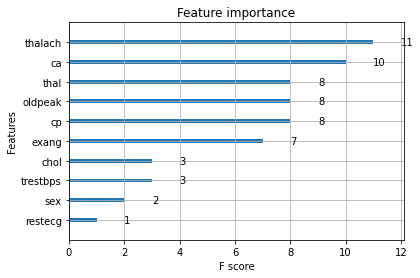

In [ ]:
print("Feature Importances : ", xgb_best.feature_importances_)

# plot feature importance
plot_importance(xgb_cl)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
selection = SelectFromModel(xgb_best)
selection.fit(X_resampled, y_resampled)

# Transform the train and test features
select_X_res = selection.transform(X_resampled)
select_X_test = selection.transform(X_test) 

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=0.511652628853783,
                                        early_stopping_rounds=9,
                                        gamma=0.3820944789348069,
                                        learning_rate=0.22602253519109866,
                                        max_delta_step=0, max_depth=10,
                                        min_child_weight=1, min_samples_leaf=6,
                                        missing=None, n_estimators=120,
                                        n_jobs=1, nthread=None,
                                        objective='reg:logistic',
                                        random_state=0, reg_alpha=0,
                                        reg_lambda=1, scale_pos_weight=1,
                                        seed=None, silent=None,
  

In [ ]:
select_X_res

# Predict with best model and selected features

In [ ]:
# train model
#selection_model = xgb_best
xgb_best.fit(select_X_res, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.511652628853783,
              early_stopping_rounds=9, gamma=0.3820944789348069,
              learning_rate=0.22602253519109866, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_samples_leaf=6, missing=None,
              n_estimators=120, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.39367838606118083, verbosity=1)

In [ ]:
errors_train_test(xgb_best, select_X_res, select_X_test, y_resampled, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.511652628853783,
              early_stopping_rounds=9, gamma=0.3820944789348069,
              learning_rate=0.22602253519109866, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_samples_leaf=6, missing=None,
              n_estimators=120, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.39367838606118083, verbosity=1)
f1_train : 0.8556149732620322
f1_test : 0.8695652173913043


In [ ]:
y_pred_best = xgb_best.predict(X_test)

In [ ]:
scoref1 = f1_score(y_test, y_pred)

In [ ]:
print(scoref1)

0.8260869565217391


# Helper - Error comparison function

In [ ]:
def errors_train_test(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
  ''' computes f1 score for train and test sets for the model
  '''
  y_pred_train = model.predict(X_train)
  y_pred_test  = model.predict(X_test)

  f1_train = f1_score(y_train, y_pred_train)
  f1_test = f1_score(y_test, y_pred_test)

  print(str(model))
  print('f1_train : ' + str(f1_train))
  print('f1_test : ' + str(f1_test))

# XGboost

In [ ]:
# test avec xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='reg:logistic', **xgb_best_params)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.32665379200175954,
              early_stopping_rounds=13, gamma=0.30268970276924567,
              learning_rate=0.8963868285980652, max_delta_step=0, max_depth=2,
              min_child_weight=1, min_samples_leaf=2, missing=None,
              n_estimators=420, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.38921992466973543, verbosity=1)

In [ ]:
xgb_best_params = {'colsample_bytree': 0.32665379200175954, 'early_stopping_rounds': 13, 'gamma': 0.30268970276924567, 'learning_rate': 0.8963868285980652, 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 420, 'subsample': 0.38921992466973543}

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print(f1_score(y_test, y_pred_xgb))

0.816326530612245


In [ ]:
y_pred_xgb_train = xgb.predict(X_train)
print(f1_score(y_train, y_pred_xgb_train))

0.994475138121547


In [ ]:
errors_train_test(xgb, X_train, X_test, y_train, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.32665379200175954,
              early_stopping_rounds=13, gamma=0.30268970276924567,
              learning_rate=0.8963868285980652, max_delta_step=0, max_depth=2,
              min_child_weight=1, min_samples_leaf=2, missing=None,
              n_estimators=420, n_jobs=1, nthread=None,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.38921992466973543, verbosity=1)
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.32665379200175954,
              early_stopping_rounds=13, gamma=0.30268970276924567,
              learning_rate=0.8963868285980652, max_delta_step=0, max_depth=2,
              min_child_weight=1, min_samples_leaf=2, missing=None

# Logistic Regression 

In [ ]:
logreg = LogisticRegressionCV(cv=5, random_state=0, scoring = 'f1')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring='f1',
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
errors_train_test(logreg, X_train, X_test, y_train, y_test)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring='f1',
                     solver='lbfgs', tol=0.0001, verbose=0)
f1_train : 0.8541666666666666
f1_test : 0.8695652173913043


In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
127,55,1,1,130,262,0,1,155,0,0.0,2,0,2
108,54,0,1,132,288,1,0,159,1,0.0,2,1,2
69,43,1,0,110,211,0,1,161,0,0.0,2,0,3
84,48,1,0,122,222,0,0,186,0,0.0,2,0,2
97,58,1,0,114,318,0,2,140,0,4.4,0,3,1


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
errors_train_test(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
f1_train : 0.967391304347826
f1_test : 0.9361702127659574


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    f1_score_train = f1_score(train, rf.predict(train))
    f1_score_test = f1_score(test, rf.predict())
    scores.append((f1_score))
#    fprs.append(fpr)
#    tprs.append(tpr)

#plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['f1 Train', 'f1 Test'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

ValueError: ignored

# Voting classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
# Set seed for reproducibility
SEED=1
# Instantiate lr
# lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNN(n_neighbors=13)
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)
# Define the list classifiers
classifiers = [  ('Random Forest', rf)]
# , ('K Nearest Neighbours', knn),('Logistic Regression', logreg),('Classification Tree', dt),

In [ ]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers, voting = 'soft')   #   your list of classifiers

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred_test = vc.predict(X_test)
y_pred_train = vc.predict(X_train)
# Calculate f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print('Voting Classifier: {:.3f}'.format(f1_train))
print(f1_test)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.

Voting Classifier: 1.000
0.782608695652174


# Generate test predictions for submission

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [ ]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [ ]:
test_data = selection.transform(test_data)

In [ ]:
test_pred = xgb_best.predict(test_data)

In [ ]:
prediction = pd.DataFrame(test_pred)
prediction.rename(columns = {0:'prediction'}, inplace = True)
prediction.to_csv('prediction.csv', index = False)

In [ ]:
# 0 #41	olgab	83.49514563106797

In [ ]:
# logistic regression , split train test rando state = 0,
#32884 / 25/12/20 08:01 / olgab	Accepted	86.53846153846153 

In [ ]:
# RF 
# f1_train : 0.967391304347826
# f1_test : 0.9361702127659574
#32890 / 25/12/20 08:18 / olgab	Accepted	87.37864077669903

=> #21	olgab	87.37864077669903

In [ ]:
# Erreur soumis le meme fichier # Logreg CV = 5
f1_train : 0.8541666666666666
f1_test : 0.8695652173913043
#32893 / 25/12/20 08:23 / olgab	Accepted	86.53846153846153

In [ ]:
# RF sur l'ensemble des données X y :
#32907 / 25/12/20 08:50 / olgab	Accepted	85.71428571428572 

In [ ]:
# xgboost with feature selection 
# 79, worst perf ever !